In [1]:
import os
import multiprocessing
import scipy
import matplotlib as mpl
import seaborn as sns
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import librosa as lb
import librosa.display as lbd
import soundfile as sf
from scipy import signal
from datetime import datetime
import math


PATH = "C:/dev/Thesis/Thesis 2/Raw data/bombus/"
SAVE_PATH = f"{os.getcwd()}/data/"

pd.set_option('display.max_colwidth', 200)
species = ['hortorum', 'lapidarius', 'muscorum', 'pascuorum', 'soroeensis', 'sylvarum', 'terrestris']

In [2]:
print(f"""
librosa: {lb.__version__}
soundfile: {sf.__version__}
seaborn: {sns.__version__}
matplotlib: {mpl.__version__}
numpy: {np.__version__}
scikit-learn: {sk.__version__}
pandas: {pd.__version__}
scipy: {scipy.__version__}
""")


librosa: 0.10.0
soundfile: 0.12.1
seaborn: 0.12.2
matplotlib: 3.5.3
numpy: 1.21.6
scikit-learn: 1.0.2
pandas: 1.1.5
scipy: 1.7.3



In [3]:
# data at: A:\Thesis\notebooks\data\Kaggle\Smart Bee Colony Monitor - Clips of Beehive Sounds\sound_files\sound_files
files = lb.util.find_files(PATH, ext=['wav'])
files = np.asarray(files)
files


array(['A:\\Thesis\\data\\raw\\Raw data\\bombus\\2020-08-03\\Terrestris_worker\\SR001MS.WAV',
       'A:\\Thesis\\data\\raw\\Raw data\\bombus\\2020-08-03\\Terrestris_worker\\SR001XY.WAV',
       'A:\\Thesis\\data\\raw\\Raw data\\bombus\\2020-08-03\\Terrestris_worker\\SR002MS.WAV',
       'A:\\Thesis\\data\\raw\\Raw data\\bombus\\2020-08-03\\Terrestris_worker\\SR002XY.WAV',
       'A:\\Thesis\\data\\raw\\Raw data\\bombus\\2020-08-03\\Terrestris_worker\\SR003MS.WAV',
       'A:\\Thesis\\data\\raw\\Raw data\\bombus\\2020-08-03\\Terrestris_worker\\SR003XY.WAV',
       'A:\\Thesis\\data\\raw\\Raw data\\bombus\\2020-08-03\\Terrestris_worker\\SR004MS.WAV',
       'A:\\Thesis\\data\\raw\\Raw data\\bombus\\2020-08-03\\Terrestris_worker\\SR004XY.WAV',
       'A:\\Thesis\\data\\raw\\Raw data\\bombus\\2020-08-03\\Terrestris_worker\\SR005MS.WAV',
       'A:\\Thesis\\data\\raw\\Raw data\\bombus\\2020-08-03\\Terrestris_worker\\SR005XY.WAV',
       'A:\\Thesis\\data\\raw\\Raw data\\bombus\\2020-08-03\

In [4]:
titles = []
extensions = []
durations = []
species = []
caste = []
files_filtered = []
dates = []
type_xyms = []

for i in range(0, len(files)):
    info = files[i].split('\\')[-2].split('_')
    if len(info) == 2:
        dates.append(datetime.strptime(files[i].split("\\")[-3], '%Y-%m-%d'))
        species.append(info[0].lower())
        caste.append(info[1].lower())
        titles.append(files[i].split("\\")[-1].split(".")[0][:-2])
        extensions.append(files[i].split("\\")[-1].split(".")[1].lower())
        durations.append(lb.get_duration(path=files[i]))
        files_filtered.append(files[i])
        xy_or_ms = 'XY' if 'XY' in files[i].split('\\')[-1].split('.')[0].upper() else 'MS'
        type_xyms.append(f"{xy_or_ms}")

print(f"""
    dates = {len(dates)} - {type(dates[0])}
    titles = {len(titles)}
    types = {len(type_xyms)}
    extensions = {len(extensions)}
    species = {len(species)}
    caste = {len(caste)}
    durations = {len(durations)}
""")


    dates = 256 - <class 'datetime.datetime'>
    titles = 256
    types = 256
    extensions = 256
    species = 256
    caste = 256
    durations = 256



In [5]:
df = pd.DataFrame({
    "date": dates,
    "title": titles,
    "extension": extensions,
    "XY/MS": type_xyms,
    "species": species,
    "caste": caste,
    "location": files_filtered,
    "duration (s)": durations,
})
df

,date,title,extension,XY/MS,species,caste,location,duration (s)
0,2020-08-03,SR001,wav,MS,terrestris,worker,A:\Thesis\data\raw\Raw data\bombus\2020-08-03\Terrestris_worker\SR001MS.WAV,31.125333
1,2020-08-03,SR001,wav,XY,terrestris,worker,A:\Thesis\data\raw\Raw data\bombus\2020-08-03\Terrestris_worker\SR001XY.WAV,31.125333
2,2020-08-03,SR002,wav,MS,terrestris,worker,A:\Thesis\data\raw\Raw data\bombus\2020-08-03\Terrestris_worker\SR002MS.WAV,15.869333
3,2020-08-03,SR002,wav,XY,terrestris,worker,A:\Thesis\data\raw\Raw data\bombus\2020-08-03\Terrestris_worker\SR002XY.WAV,15.869333
4,2020-08-03,SR003,wav,MS,terrestris,worker,A:\Thesis\data\raw\Raw data\bombus\2020-08-03\Terrestris_worker\SR003MS.WAV,18.036000
...,...,...,...,...,...,...,...,...
251,2020-08-17,S1708W04_SR004,wav,XY,terrestris,worker,A:\Thesis\data\raw\Raw data\bombus\2020-08-17\terrestris_worker\S1708W04_SR004XY.WAV,5.625333
252,2020-08-17,S1708W05_SR005,wav,MS,terrestris,worker,A:\Thesis\data\raw\Raw data\bombus\2020-08-17\terrestris_worker\S1708W05_SR005MS.WAV,18.494667
253,2020-08-17,S1708W05_SR005,wav,XY,terrestris,worker,A:\Thesis\data\raw\Raw data\bombus\2020-08-17\terrestris_worker\S1708W05_SR005XY.WAV,18.494667
254,2020-08-17,S1708W06_SR006,wav,MS,terrestris,worker,A:\Thesis\data\raw\Raw data\bombus\2020-08-17\terrestris_worker\S1708W06_SR006MS.WAV,3.481333


In [6]:
df = df.sort_values(by="duration (s)", ascending=False).reset_index(drop=True)
df

,date,title,extension,XY/MS,species,caste,location,duration (s)
0,2020-08-14,S1408W07_SR007,wav,XY,terrestris,workers,A:\Thesis\data\raw\Raw data\bombus\2020-08-14\terrestris_workers\S1408W07_SR007XY.WAV,101.873333
1,2020-08-14,S1408W07_SR007,wav,MS,terrestris,workers,A:\Thesis\data\raw\Raw data\bombus\2020-08-14\terrestris_workers\S1408W07_SR007MS.WAV,101.873333
2,2020-08-14,S1408W22_SR022,wav,XY,terrestris,workers,A:\Thesis\data\raw\Raw data\bombus\2020-08-14\terrestris_workers\S1408W22_SR022XY.WAV,63.209333
3,2020-08-14,S1408W22_SR022,wav,MS,terrestris,workers,A:\Thesis\data\raw\Raw data\bombus\2020-08-14\terrestris_workers\S1408W22_SR022MS.WAV,63.209333
4,2020-08-14,S1408M04_SR004,wav,MS,terrestris,males,A:\Thesis\data\raw\Raw data\bombus\2020-08-14\terrestris_males\S1408M04_SR004MS.WAV,49.308000
...,...,...,...,...,...,...,...,...
251,2020-08-14,S1408W03_SR003,wav,MS,terrestris,workers,A:\Thesis\data\raw\Raw data\bombus\2020-08-14\terrestris_workers\S1408W03_SR003MS.WAV,3.048000
252,2020-08-13,SR002,wav,MS,terrestris,worker,A:\Thesis\data\raw\Raw data\bombus\2020-08-13\terrestris_worker\SR002MS.WAV,2.248000
253,2020-08-13,S1308W02_SR002,wav,XY,terrestris,worker,A:\Thesis\data\raw\Raw data\bombus\2020-08-13\terrestris_worker\S1308W02_SR002XY.WAV,2.248000
254,2020-08-13,S1308W02_SR002,wav,MS,terrestris,worker,A:\Thesis\data\raw\Raw data\bombus\2020-08-13\terrestris_worker\S1308W02_SR002MS.WAV,2.248000


In [7]:
df_xy = df[(df['XY/MS'] == 'XY')]
df_ms = df[(df['XY/MS'] == 'MS')]

In [8]:
df_xy

,date,title,extension,XY/MS,species,caste,location,duration (s)
0,2020-08-14,S1408W07_SR007,wav,XY,terrestris,workers,A:\Thesis\data\raw\Raw data\bombus\2020-08-14\terrestris_workers\S1408W07_SR007XY.WAV,101.873333
2,2020-08-14,S1408W22_SR022,wav,XY,terrestris,workers,A:\Thesis\data\raw\Raw data\bombus\2020-08-14\terrestris_workers\S1408W22_SR022XY.WAV,63.209333
5,2020-08-14,S1408M04_SR004,wav,XY,terrestris,males,A:\Thesis\data\raw\Raw data\bombus\2020-08-14\terrestris_males\S1408M04_SR004XY.WAV,49.308000
7,2020-08-03,SR007,wav,XY,terrestris,worker,A:\Thesis\data\raw\Raw data\bombus\2020-08-03\Terrestris_worker\SR007XY.WAV,47.008000
8,2020-08-06,SR003,wav,XY,terrestris,male,A:\Thesis\data\raw\Raw data\bombus\2020-08-06\terrestris_male\SR003XY.WAV,41.817333
...,...,...,...,...,...,...,...,...
246,2020-08-12,SR001,wav,XY,terrestris,males,A:\Thesis\data\raw\Raw data\bombus\2020-08-12\terrestris_males\SR001XY.WAV,3.132000
248,2020-08-12,S1208M01_SR001,wav,XY,terrestris,males,A:\Thesis\data\raw\Raw data\bombus\2020-08-12\terrestris_males\S1208M01_SR001XY.WAV,3.132000
250,2020-08-14,S1408W03_SR003,wav,XY,terrestris,workers,A:\Thesis\data\raw\Raw data\bombus\2020-08-14\terrestris_workers\S1408W03_SR003XY.WAV,3.048000
253,2020-08-13,S1308W02_SR002,wav,XY,terrestris,worker,A:\Thesis\data\raw\Raw data\bombus\2020-08-13\terrestris_worker\S1308W02_SR002XY.WAV,2.248000


In [9]:
df_ms

,date,title,extension,XY/MS,species,caste,location,duration (s)
1,2020-08-14,S1408W07_SR007,wav,MS,terrestris,workers,A:\Thesis\data\raw\Raw data\bombus\2020-08-14\terrestris_workers\S1408W07_SR007MS.WAV,101.873333
3,2020-08-14,S1408W22_SR022,wav,MS,terrestris,workers,A:\Thesis\data\raw\Raw data\bombus\2020-08-14\terrestris_workers\S1408W22_SR022MS.WAV,63.209333
4,2020-08-14,S1408M04_SR004,wav,MS,terrestris,males,A:\Thesis\data\raw\Raw data\bombus\2020-08-14\terrestris_males\S1408M04_SR004MS.WAV,49.308000
6,2020-08-03,SR007,wav,MS,terrestris,worker,A:\Thesis\data\raw\Raw data\bombus\2020-08-03\Terrestris_worker\SR007MS.WAV,47.008000
9,2020-08-06,SR003,wav,MS,terrestris,male,A:\Thesis\data\raw\Raw data\bombus\2020-08-06\terrestris_male\SR003MS.WAV,41.817333
...,...,...,...,...,...,...,...,...
247,2020-08-12,SR001,wav,MS,terrestris,males,A:\Thesis\data\raw\Raw data\bombus\2020-08-12\terrestris_males\SR001MS.WAV,3.132000
249,2020-08-12,S1208M01_SR001,wav,MS,terrestris,males,A:\Thesis\data\raw\Raw data\bombus\2020-08-12\terrestris_males\S1208M01_SR001MS.WAV,3.132000
251,2020-08-14,S1408W03_SR003,wav,MS,terrestris,workers,A:\Thesis\data\raw\Raw data\bombus\2020-08-14\terrestris_workers\S1408W03_SR003MS.WAV,3.048000
252,2020-08-13,SR002,wav,MS,terrestris,worker,A:\Thesis\data\raw\Raw data\bombus\2020-08-13\terrestris_worker\SR002MS.WAV,2.248000


In [10]:
def create_save_path(i):
    global df
    try:
        os.mkdir(f"./bandpass_filter")
    except FileExistsError:
        pass
    try:
        os.mkdir(f"./bandpass_filter/{df.loc[i, 'species']}")
    except FileExistsError:
        pass
    try:
        os.mkdir(f"./bandpass_filter/{df.loc[i, 'species']}/{df.loc[i, 'caste']}")
    except FileExistsError:
        pass
    try:
        os.mkdir(f"./bandpass_filter/{df.loc[i, 'species']}/{df.loc[i, 'caste']}/figures")
    except FileExistsError:
        pass
    # sf.write(f"{save_path}/{save_title}.wav", data=signal, samplerate=sr, subtype='PCM_24')
for i in range (0, len(df)):
    create_save_path(i)

In [11]:
df.loc[144]

date                                                                              2020-08-14 00:00:00
title                                                                                  S1408W14_SR014
extension                                                                                         wav
XY/MS                                                                                              MS
species                                                                                    terrestris
caste                                                                                         workers
location        A:\Thesis\data\raw\Raw data\bombus\2020-08-14\terrestris_workers\S1408W14_SR014MS.WAV
duration (s)                                                                                   12.356
Name: 144, dtype: object

In [12]:
def find_index(filename, msxy=None):
    global df
    for i in range(0, len(df)):
        if filename in df.loc[i, 'title']:
            if msxy is None:
                return i
            elif df.loc[i, 'XY/MS'] == msxy:
                return i

### Bandpass freq filtering

In [13]:
# index = find_index('S1108M04_SR004', msxy='XY')
index = 144
print(f'{index}\n')
df.loc[index]

144



date                                                                              2020-08-14 00:00:00
title                                                                                  S1408W14_SR014
extension                                                                                         wav
XY/MS                                                                                              MS
species                                                                                    terrestris
caste                                                                                         workers
location        A:\Thesis\data\raw\Raw data\bombus\2020-08-14\terrestris_workers\S1408W14_SR014MS.WAV
duration (s)                                                                                   12.356
Name: 144, dtype: object

In [14]:
name = df.loc[index, 'title']
df.loc[index, 'location']
signal_lb, sr = lb.load(df.loc[index, 'location'], sr=48000)
print(len(signal_lb) / sr)

12.356


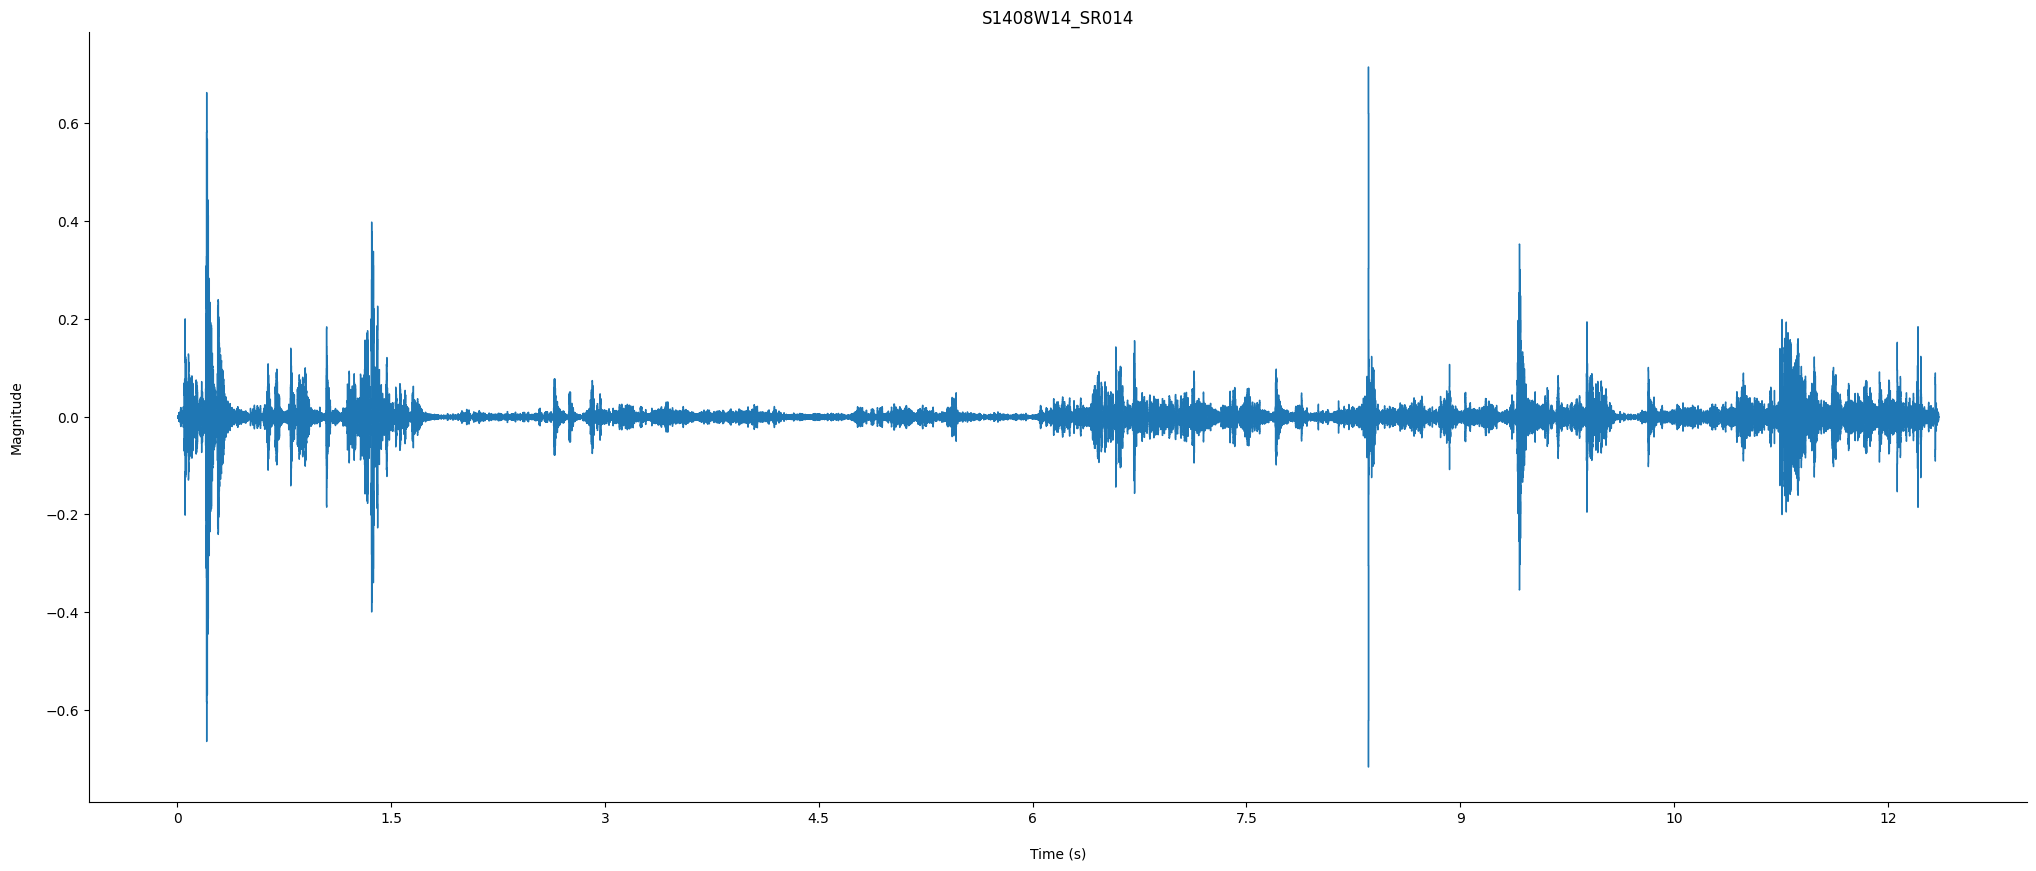

In [15]:
filename = df.loc[index]
signal_lb, sr = lb.load(df.loc[index, 'location'], sr=48000)
plt.figure(figsize=(25, 10))
lbd.waveshow(signal_lb, sr=sr, label=f"sample {index} ({df.loc[index, 'species']} - {df.loc[index, 'caste']})")
plt.title(df.loc[index, 'title'])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel("Magnitude\n")
plt.xlabel("\nTime (s)")
plt.show()

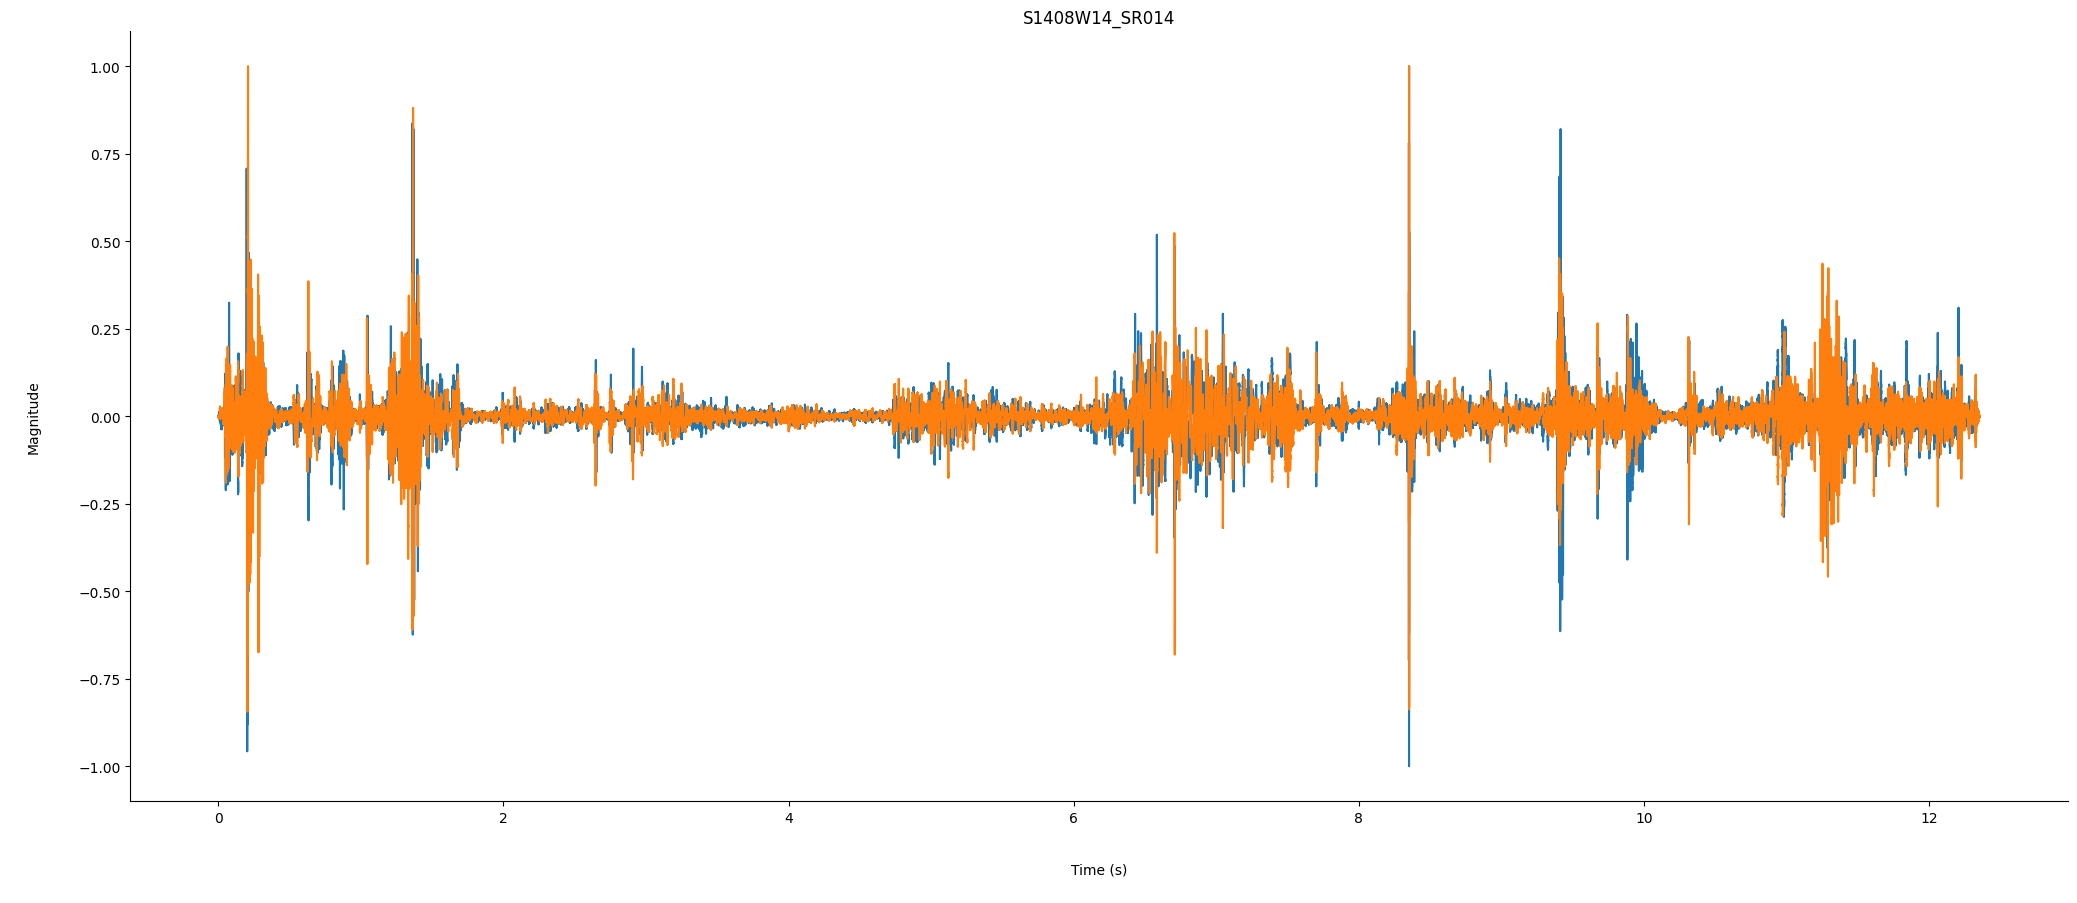

48000


In [16]:
signal_sf, sr = sf.read(df.loc[index, 'location'])
time = np.linspace(0, len(signal_sf) / sr, len(signal_sf))
title = df.loc[index, "title"]
left_channel = signal_sf[:, 0]
right_channel = signal_sf[:, 1]
plt.figure(figsize=(25, 10))
plt.plot(time, left_channel, label=f"L ({df.loc[index, 'species']} - {df.loc[index, 'caste']})")
plt.plot(time, right_channel, label=f"R ({df.loc[index, 'species']} - {df.loc[index, 'caste']})")
plt.title(df.loc[index, 'title'])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel("\nMagnitude\n\n")
plt.xlabel("\n\nTime (s)\n")
plt.show()
print(sr)

## build dir tree

In [17]:
def makedirs(path):
    global SAVE_PATH
    try:
        os.makedirs(SAVE_PATH + path)
    except FileExistsError:
        print(f"{path} already exists!", flush=True)
        pass

In [18]:
def build_dirpath(i):
    global SAVE_PATH
    title = df.loc[i, 'title']
    species = df.loc[i, 'species']
    caste = df.loc[i, 'caste']
    date = f"{df.loc[i, 'date'].month:02d}-{df.loc[i, 'date'].day:02d}"
    msxy = df.loc[i, 'XY/MS']
    
    makedirs(f'{species}/{caste}/{date}/{title}/{msxy}/Audio/Original')
    makedirs(f'{species}/{caste}/{date}/{title}/{msxy}/Magnitude/Original')
    makedirs(f'{species}/{caste}/{date}/{title}/{msxy}/Spectogram/Original')
    makedirs(f'{species}/{caste}/{date}/{title}/{msxy}/Spectogram/heat')
    makedirs(f'{species}/{caste}/{date}/{title}/{msxy}/Spectogram/spectogram')
    makedirs(f'{species}/{caste}/{date}/{title}/{msxy}/Frequency/Original')
    makedirs(f'{species}/{caste}/{date}/{title}/{msxy}/Frequency/bins')
    makedirs(f'{species}/{caste}/{date}/{title}/{msxy}/Frequency/absolute')

In [19]:
def get_filepath(i):
    return f"{df.loc[i, 'species']}/{df.loc[i, 'caste']}/{df.loc[i, 'date'].month:02d}-{df.loc[i, 'date'].day:02d}/{df.loc[i, 'title']}/{df.loc[i, 'XY/MS']}/"

In [20]:
print(get_filepath(2))

terrestris/workers/08-14/S1408W22_SR022/XY/


In [21]:
def save(signal, channels, index, subfolder, ext, x_label = "", y_label = "", addTitle=""):
    global df, SAVE_PATH
    plt.figure(figsize=(25, 10))
    destination = get_filepath(index)
    save_path = SAVE_PATH + destination + subfolder
    time = np.linspace(0, len(signal) / sr, len(signal))
    if channels == 2:
        left_channel = signal[:, 0]
        right_channel = signal[:, 1]
        plt.plot(time, left_channel, label=f"L ({df.loc[index, 'species']} - {df.loc[index, 'caste']})")
        plt.plot(time, right_channel, label=f"R ({df.loc[index, 'species']} - {df.loc[index, 'caste']})")
        plt.legend(loc='upper right')
    elif channels == 1:
        lbd.waveshow(signal, sr=sr, label=f"sample ({df.loc[index,'species']} - {df.loc[index ,'caste']})")
    else: return -1
    plt.title(df.loc[index,'title'] + " " + addTitle)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    title = f"{df.loc[index, 'title']}{'_'+addTitle if addTitle != '' else ''}"
    if ext == 'png':
        plt.ylabel(f"{y_label}\n")
        plt.xlabel(f"\n{x_label}")
        plt.ylim(-1, 1)
        plt.savefig(f"{save_path}/{title}.{ext}")
    elif ext == 'wav':
        sf.write(f"{save_path}/{title}{' - ' if addTitle != '' else ''}.{ext}", data=signal, samplerate=sr, subtype='PCM_24')
    plt.grid(visible=False)
    plt.close()

## Magnitude low-pass
##### everything above upper bound gets removed

In [22]:
# Magnitude CUTOFF
upper_bound = 0.5  # magnitude scale -1, 1
sr = 48000  # natural samplerate as determined through soundfile analysis
window = round(1250/sr, 4)

print(f'{window}s')

0.026s


In [23]:
def magnitude_pass(loc):
    global df, upper_bound, sr, window
    i = find_index(loc)
    # build_dirpath(i)
    location = df.loc[i, 'location']
    signal_lb, _ = lb.load(location, sr = sr)
    signal_sf, _ = sf.read(location)
    ssf_L = signal_sf[:, 0]
    ssf_R = signal_sf[:, 1]
    sx_lb = len(signal_lb)    
    sx_sf = len(signal_sf)
    assert sx_sf == sx_lb
    # save(ssf_L, 1, i, x_label='Time (s)', y_label='Magnitude', subfolder='Magnitude/Original', ext='png', addTitle="L-og")
    # save(ssf_R, 1, i, x_label='Time (s)', y_label='Magnitude', subfolder='Magnitude/Original', ext='png', addTitle="R-og")
    # save(signal_sf, 2, i, x_label='Time (s)', y_label='Magnitude', subfolder='Magnitude/Original', ext='png', addTitle="L+R-og")
    # save(signal_lb, 1, i, x_label='Time (s)', y_label='Magnitude', subfolder='Magnitude/Original', ext='png', addTitle="-og")
    duration = sx_lb / sr
    progress = 0  # progress of processing
    while progress < duration and duration - progress > 0.01:
        # print(f'{float(progress):.4f}/{duration}\t|\t{(progress/duration) * 100:.2f}%')
        segment = round(min(duration - progress, window), 4)
        samples = int(sr * segment)  # samples in segment
        start_i = int(sr * progress)
        end_i = start_i + samples

        if np.max(abs(signal_lb[start_i: end_i])) > upper_bound: signal_lb[start_i:end_i] = 0.0
        if np.max(abs(ssf_L[start_i: end_i])) > upper_bound: ssf_L[start_i:end_i] = 0.0
        if np.max(abs(ssf_R[start_i: end_i])) > upper_bound: ssf_R[start_i:end_i] = 0.0

        progress = round(progress + segment, 4)
    signal_sf[:, 0] = ssf_L
    signal_sf[:, 1] = ssf_R

    # save(ssf_L, 1, i, x_label='Time (s)', y_label='Magnitude', subfolder='Magnitude', ext='png', addTitle="L")
    # save(ssf_R, 1, i, x_label='Time (s)', y_label='Magnitude', subfolder='Magnitude', ext='png', addTitle="R")
    # save(signal_sf, 2, i, x_label='Time (s)', y_label='Magnitude', subfolder='Magnitude', ext='png', addTitle="L+R")
    # save(signal_lb, 1, i, x_label='Time (s)', y_label='Magnitude', subfolder='Magnitude', ext='png')
    return [signal_lb, signal_sf]


In [24]:
signal_lb_filtered, signal_sf_filtered = magnitude_pass(df.loc[144, 'title'])

## Frequency bandpass
##### everything outside the upper and lower bounds gets removed

In [25]:
# Arbitrary index, to be changed later

i = 144

<Figure size 640x480 with 0 Axes>

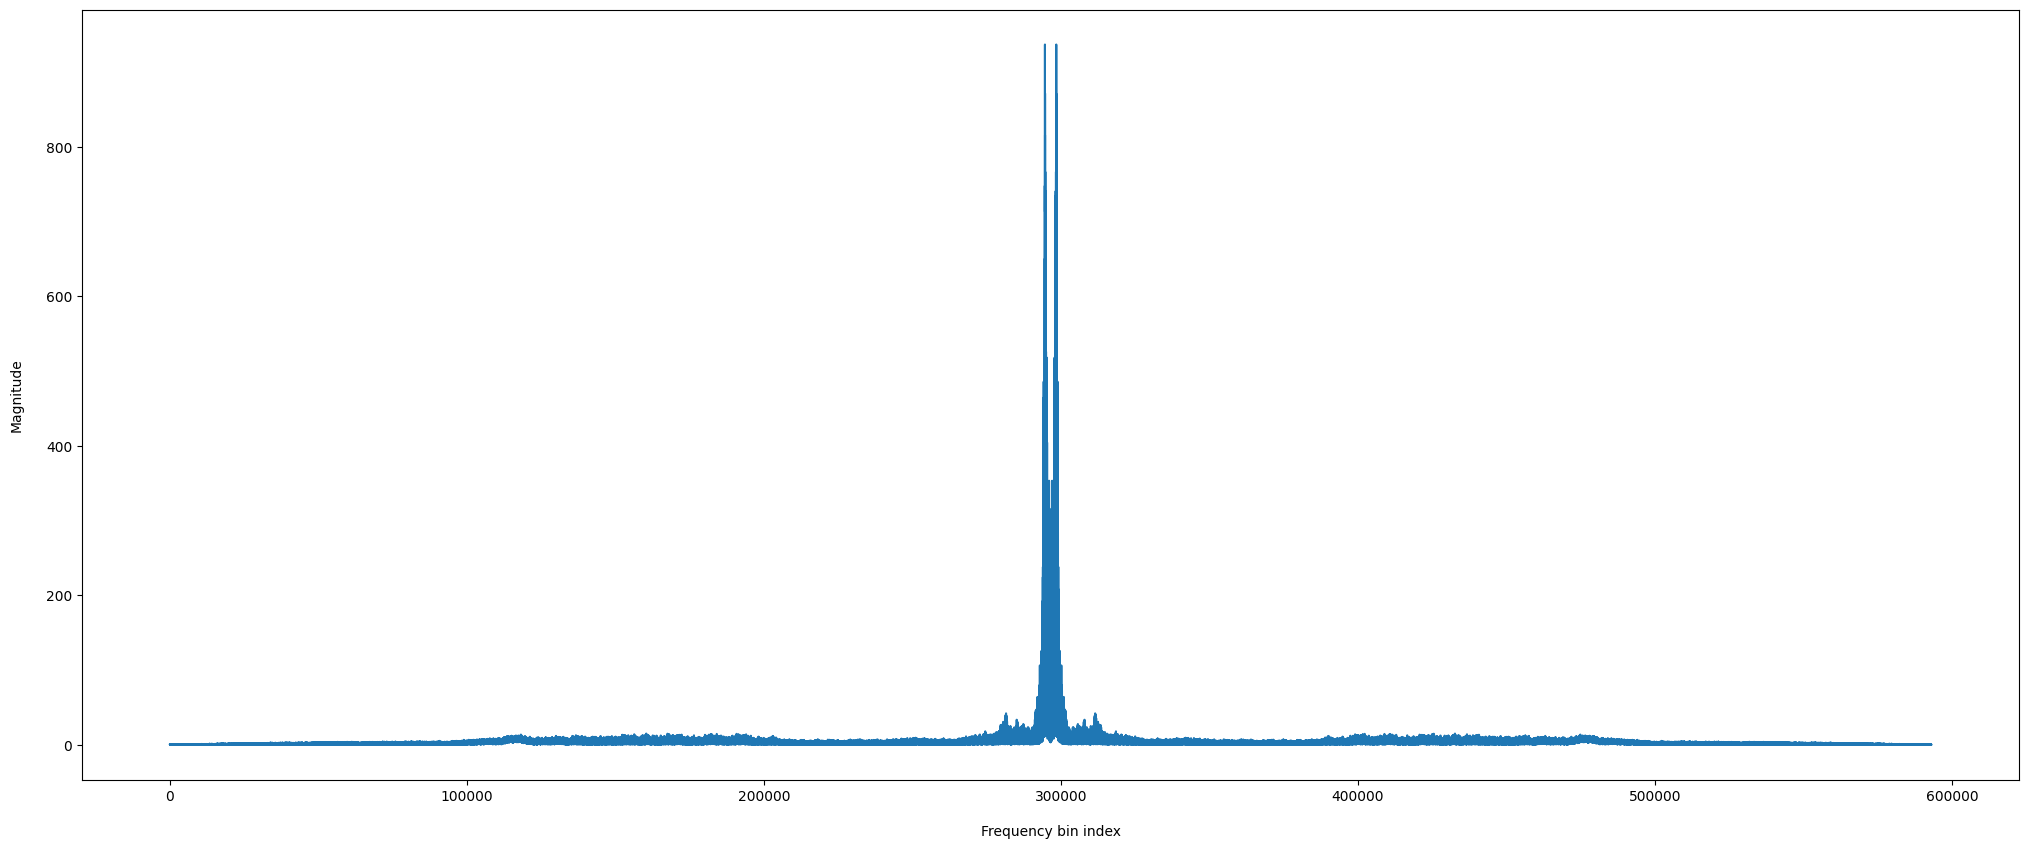

In [26]:
ft = np.fft.fft(signal_lb)
plt.clf()
plt.figure(figsize=(25, 10))
plt.plot(np.abs(np.fft.fftshift(ft)))
plt.xlabel('\nFrequency bin index')
plt.ylabel('Magnitude\n')  # this is *LIKELY* volts
plt.show()

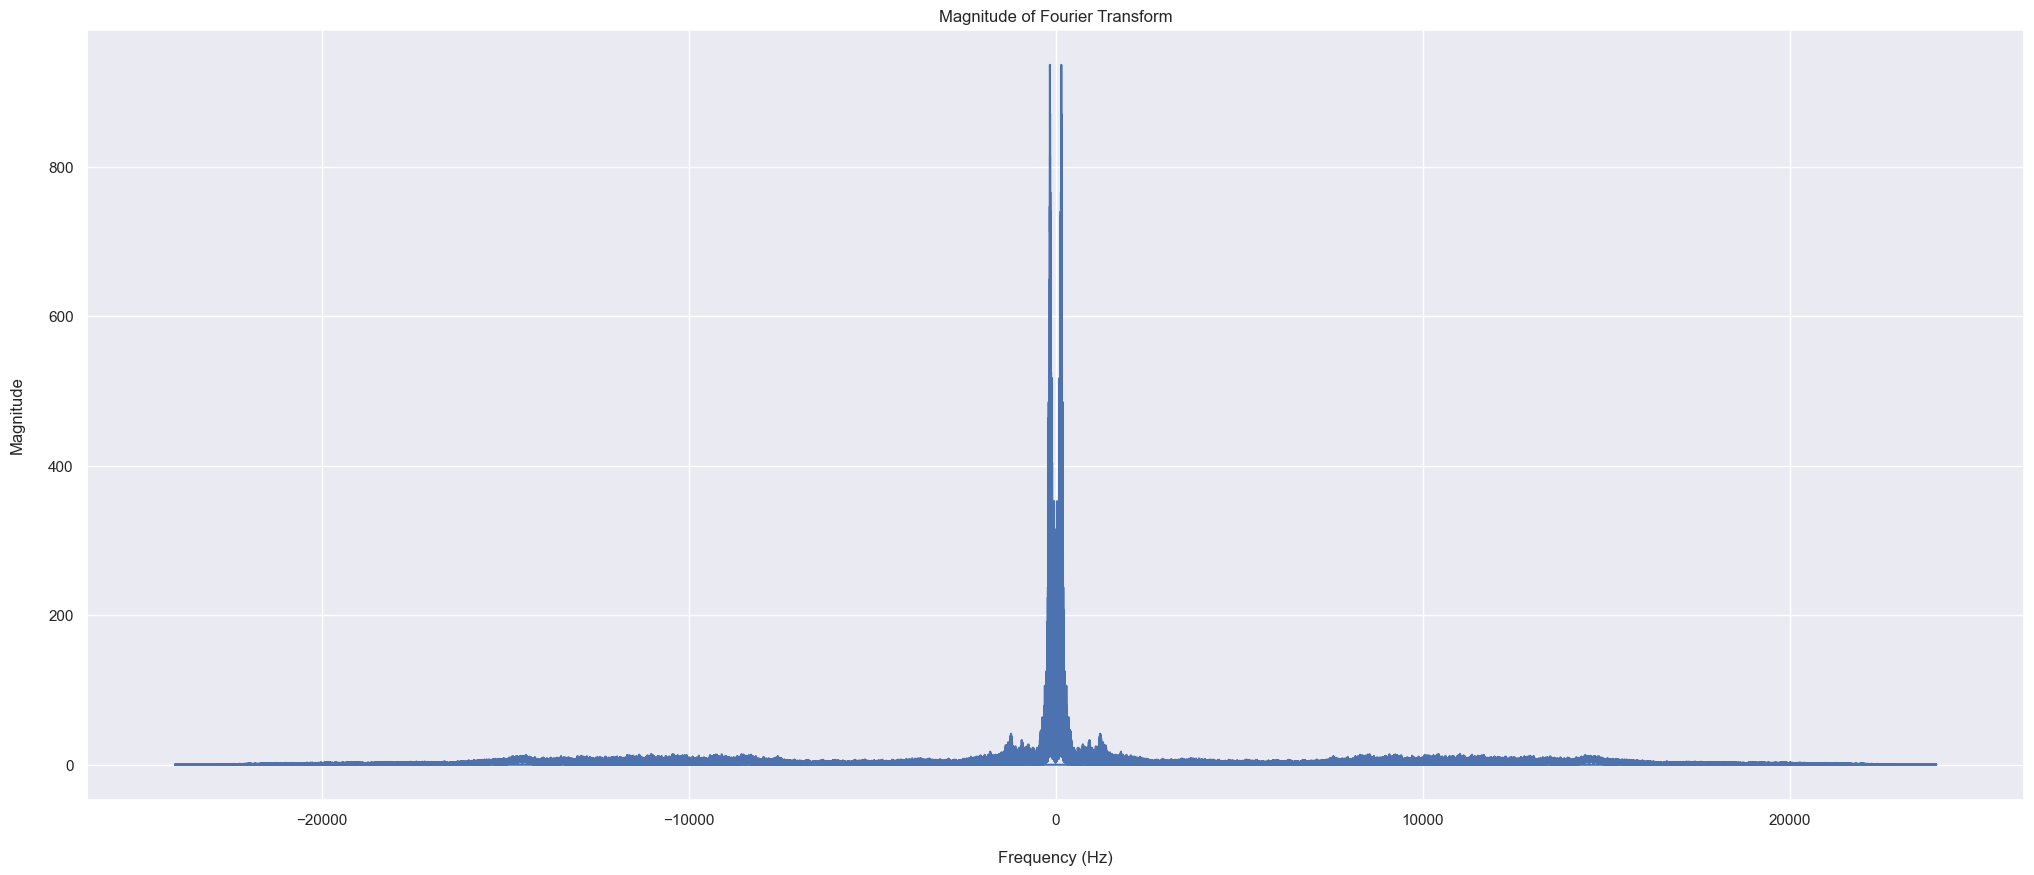

In [27]:
sx = len(signal_lb)
freq = np.fft.fftfreq(sx) * sr

sns.set()
plt.figure(figsize=(25, 10))
plt.plot(freq, np.abs(ft))
plt.xlabel('\nFrequency (Hz)')
plt.ylabel('Magnitude\n')
plt.title('Magnitude of Fourier Transform')
plt.show()

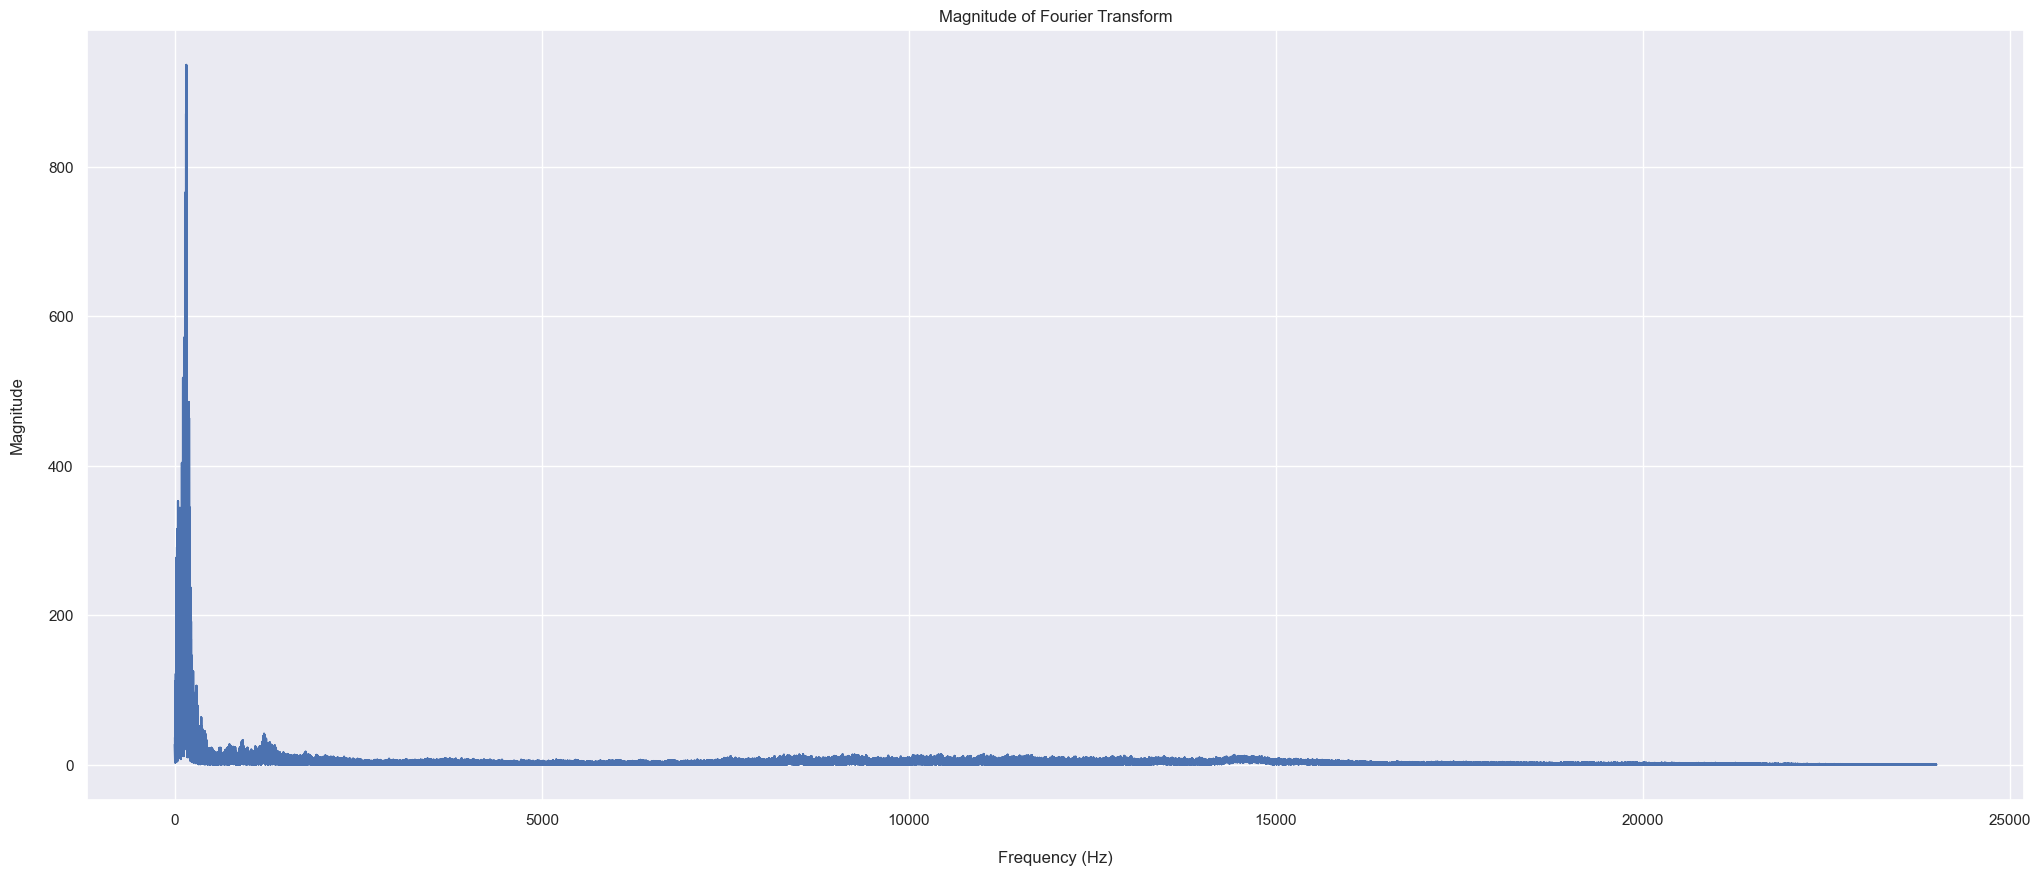

In [28]:
sx = len(signal_lb)
freq_abs = abs(freq)

sns.set()
plt.figure(figsize=(25, 10))
plt.plot(freq_abs, np.abs(ft))
plt.xlabel('\nFrequency (Hz)')
plt.ylabel('Magnitude\n')
plt.title('Magnitude of Fourier Transform')
plt.show()

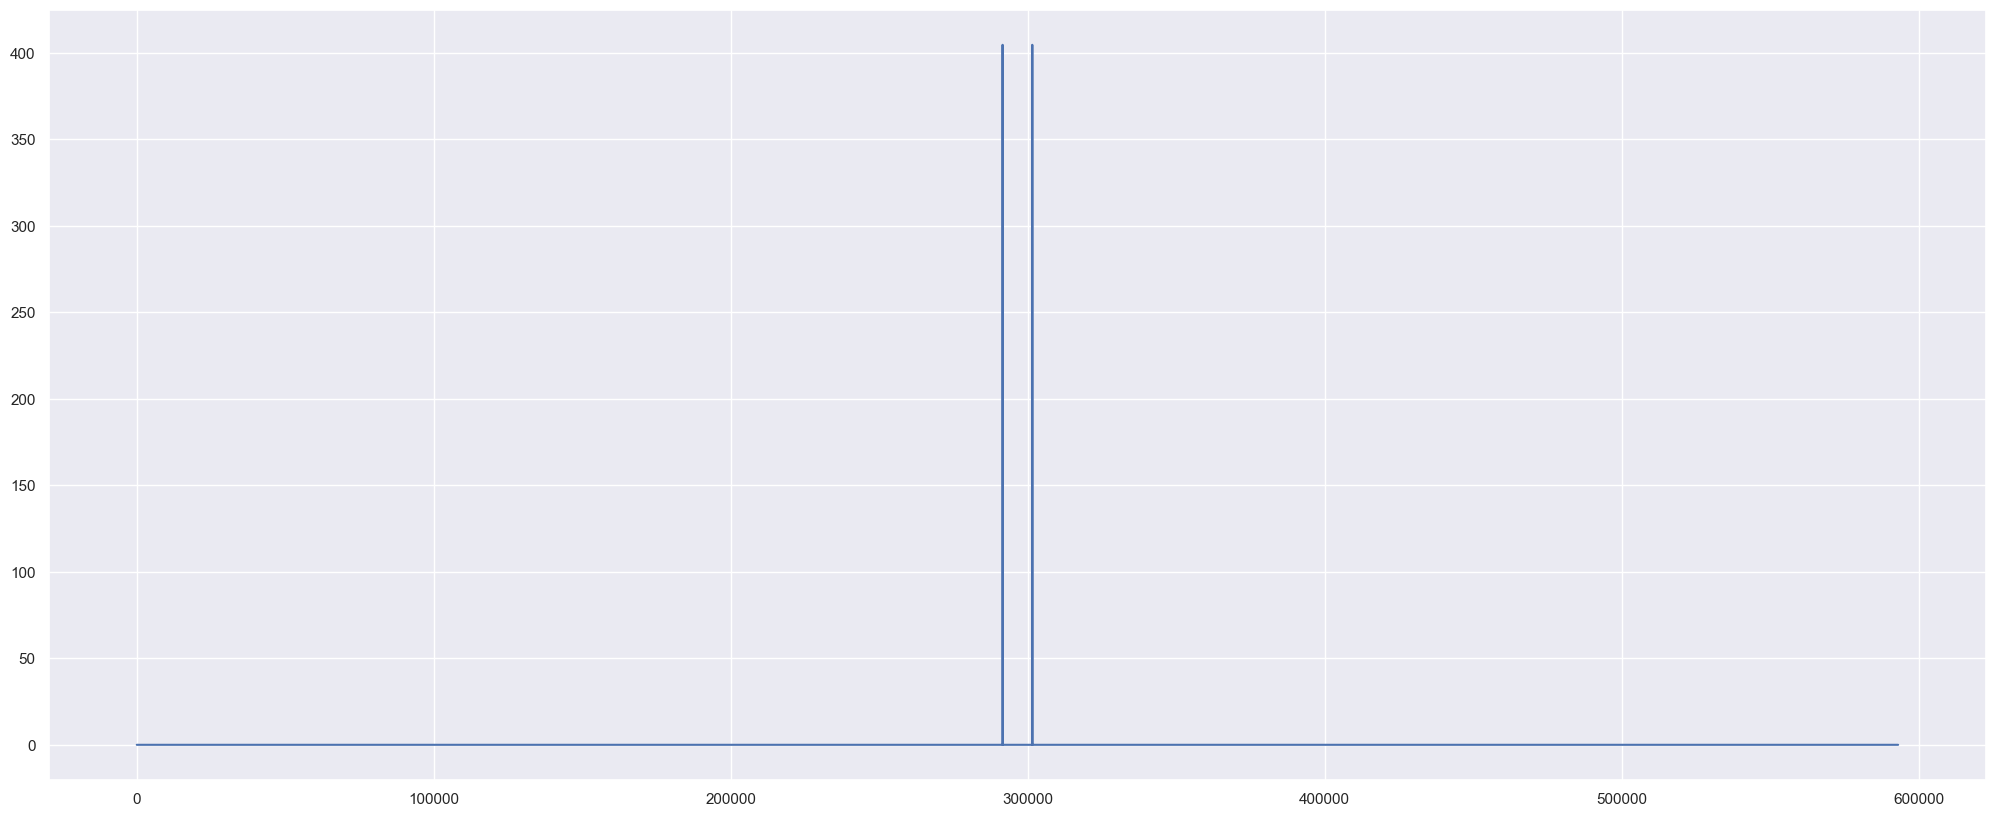

In [29]:
cutoff = {"low": 5000, "high":  5001}
fts = np.zeros_like(freq)


fts[cutoff['low']:cutoff["high"]] = freq[cutoff["low"]:cutoff["high"]]
fts[-cutoff['high']:-cutoff["low"]] = freq[cutoff["low"]:cutoff["high"]]

# Plot the filtered spectrum
plt.figure(figsize=(25, 10))
plt.plot(np.fft.fftshift(fts))
plt.show()

In [30]:
print(len(ft))

593088


In [31]:
cutoff_freq = np.array([50, 20000])  # frequency range to keep

# Calculate filter coefficients
def freq_filt(s):
    order = 4  # filter order
    nyquist_rate = sr / 2
    normalized_frequencies = cutoff_freq / nyquist_rate
    b, a = signal.butter(order, normalized_frequencies, btype='band')
    # Apply filter to audio data
    filtered_audio = signal.filtfilt(b, a, s)
    return filtered_audio 

time =  np.arange(len(signal_lb)) / sr

In [32]:
def plot(x, y, data, axs, title="", xlabel="", ylabel="", color=None):
    global df, name, i
    plot = axs[x, y]
    plot.set_title(df.loc[i, 'title'])
    plot.set_xlabel(xlabel)
    plot.set_ylabel(ylabel)
    plot.set_ylim(-1, 1)
    plot.plot(time, data, color=color, label=f"({name}) {title}")
    plot.legend()

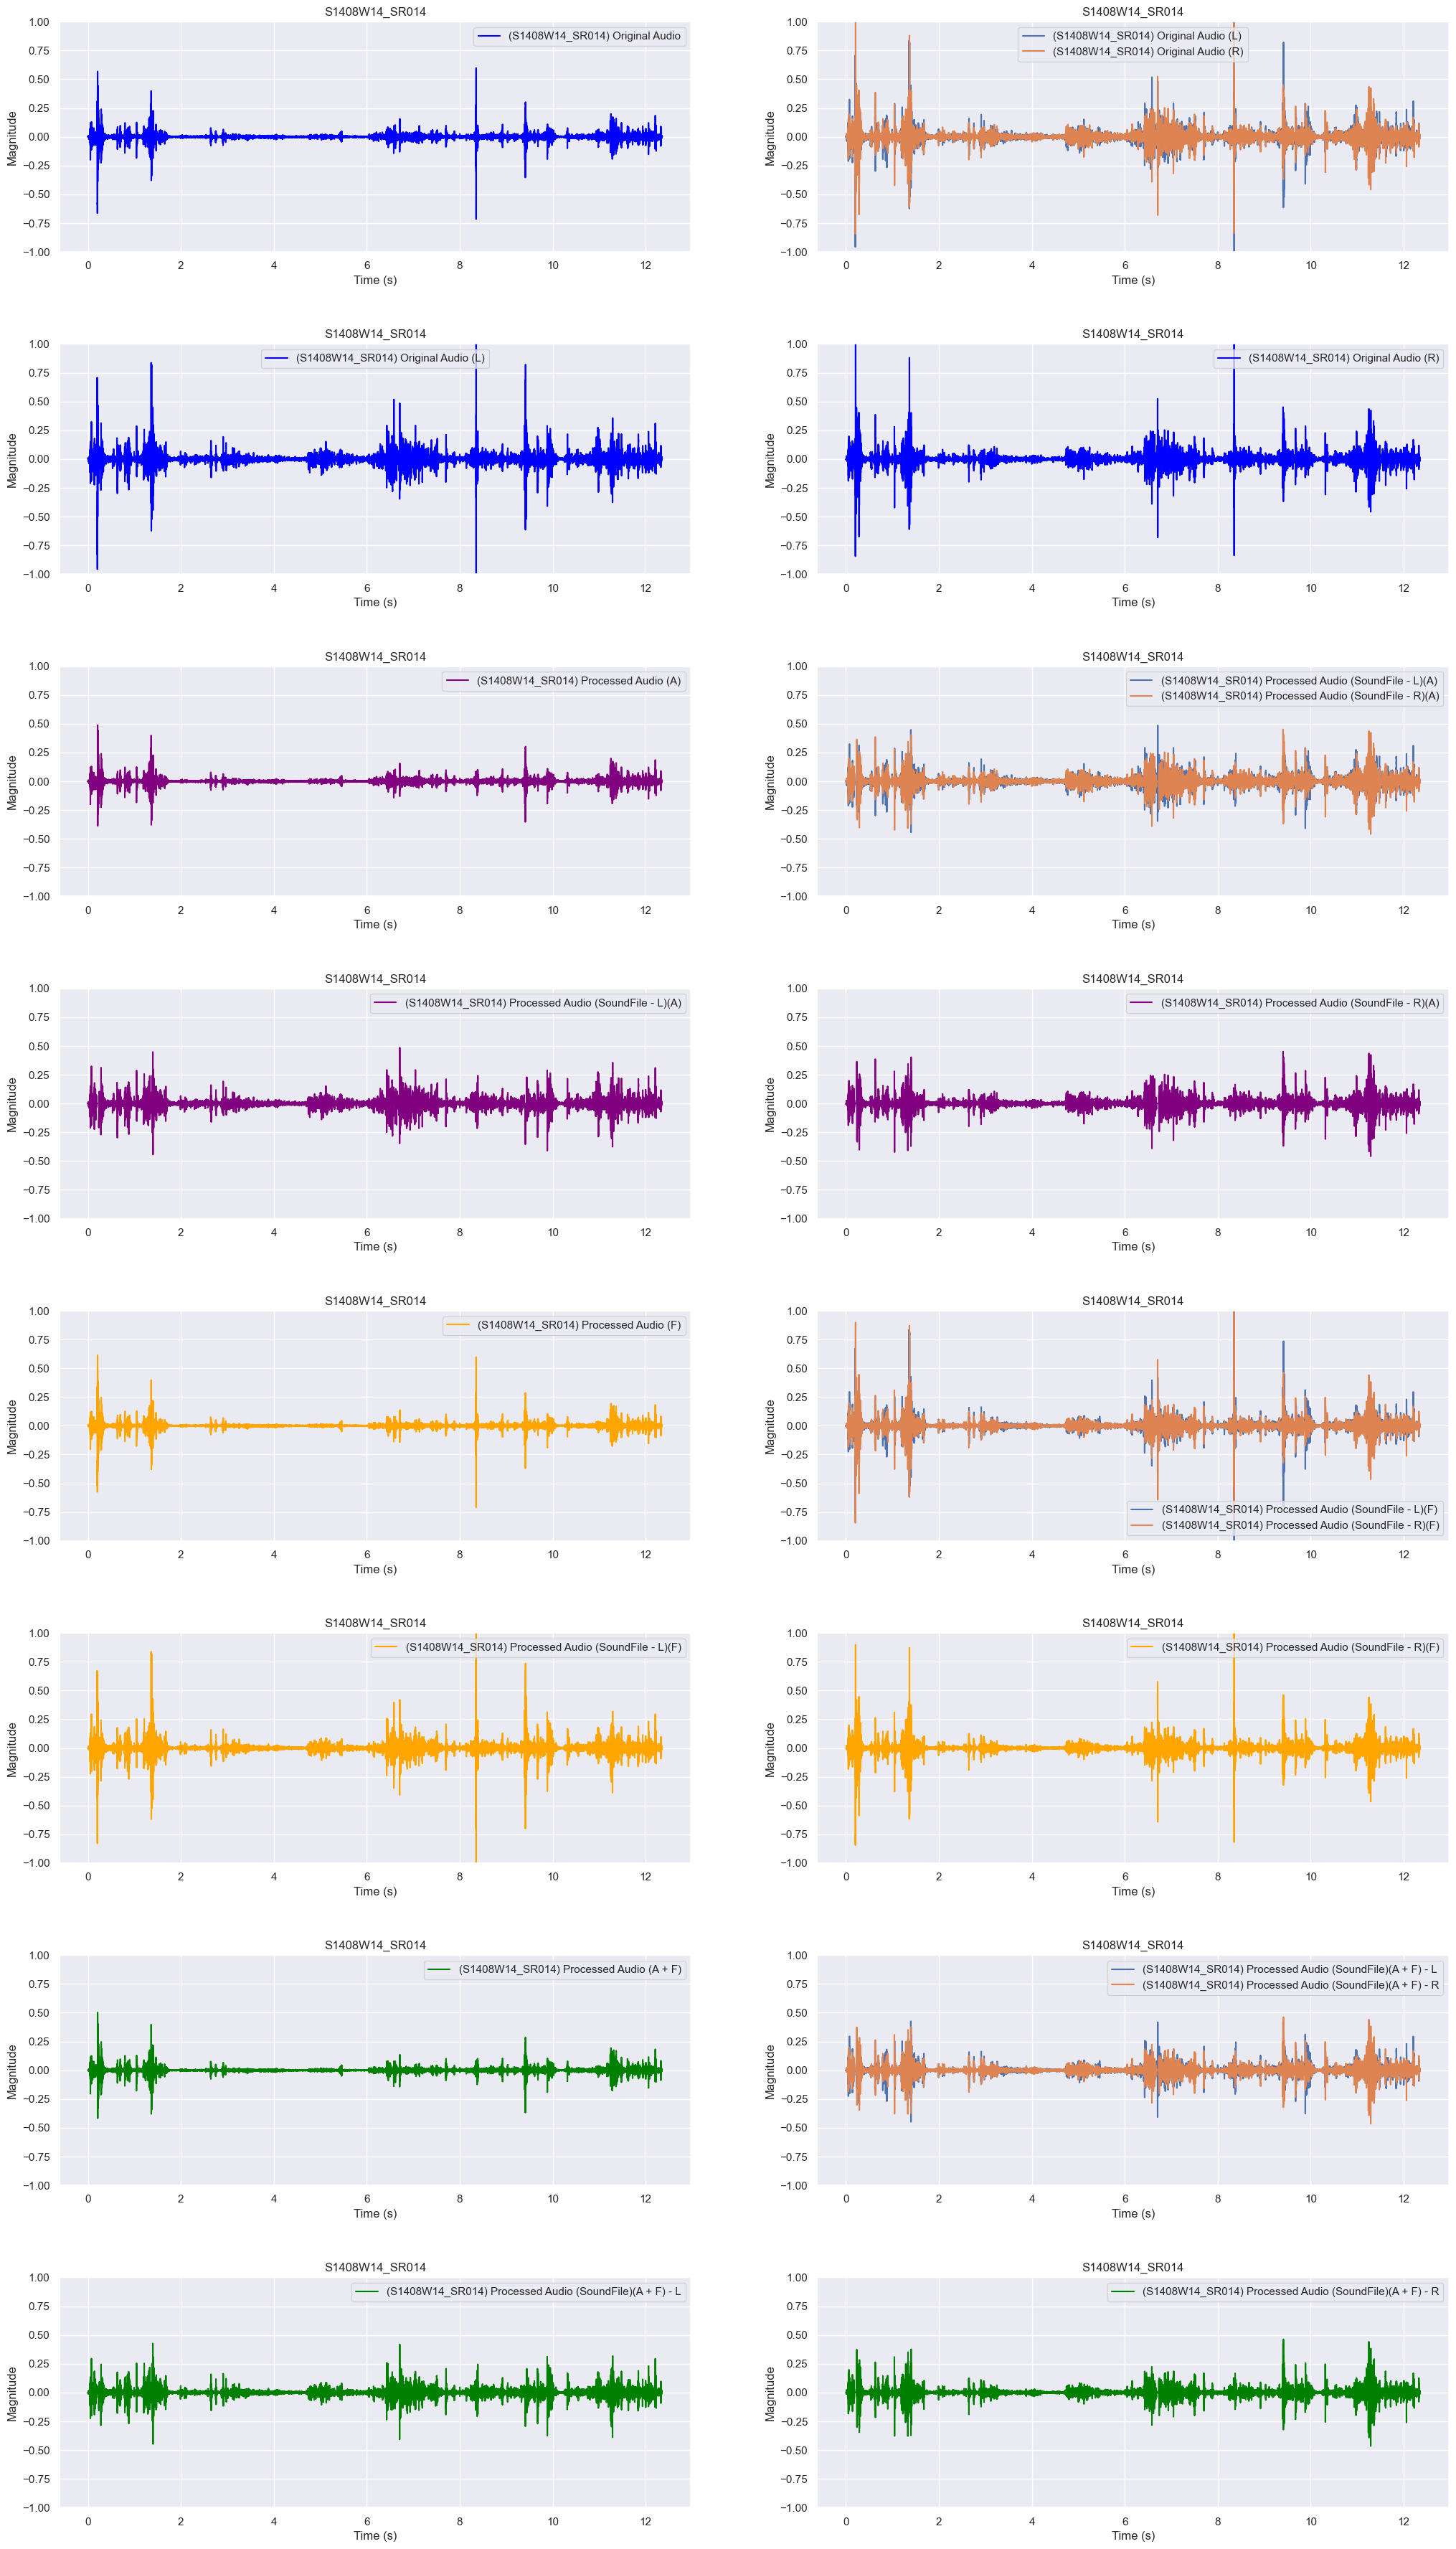

In [33]:
fig, axs = plt.subplots(nrows=8, ncols=2, figsize=(25, 45))
fig.subplots_adjust(hspace=0.4)
time =  np.arange(len(signal_lb)) / sr


# row one + two -- originals
plot(0, 0, signal_lb, axs, title='Original Audio', xlabel="Time (s)", ylabel="Magnitude", color="blue")
plot(0, 1, signal_sf[:, 0], axs, title='Original Audio (L)', xlabel="Time (s)", ylabel="Magnitude")
plot(0, 1, signal_sf[:, 1], axs, title='Original Audio (R)', xlabel="Time (s)", ylabel="Magnitude")
plot(1, 0, signal_sf[:, 0], axs, title='Original Audio (L)', xlabel="Time (s)", ylabel="Magnitude", color="blue")
plot(1, 1, signal_sf[:, 1], axs, title='Original Audio (R)', xlabel="Time (s)", ylabel="Magnitude", color="blue")

# row two + three - Magnitude filter only
plot(2, 0, signal_lb_filtered, axs, title='Processed Audio (A)', xlabel="Time (s)", ylabel="Magnitude", color="purple")
plot(2, 1, signal_sf_filtered[:, 0], axs, title='Processed Audio (SoundFile - L)(A)', xlabel="Time (s)", ylabel="Magnitude")
plot(2, 1, signal_sf_filtered[:, 1], axs, title='Processed Audio (SoundFile - R)(A)', xlabel="Time (s)", ylabel="Magnitude")
plot(3, 0, signal_sf_filtered[:, 0], axs, title='Processed Audio (SoundFile - L)(A)', xlabel="Time (s)", ylabel="Magnitude", color="purple")
plot(3, 1, signal_sf_filtered[:, 1], axs, title='Processed Audio (SoundFile - R)(A)', xlabel="Time (s)", ylabel="Magnitude", color="purple")

# row three + four - Frequency filter only
plot(4, 0, freq_filt(signal_lb), axs, title='Processed Audio (F)', xlabel="Time (s)", ylabel="Magnitude", color = "orange")
plot(4, 1, freq_filt(signal_sf[:, 0]), axs, title='Processed Audio (SoundFile - L)(F)', xlabel="Time (s)", ylabel="Magnitude")
plot(4, 1, freq_filt(signal_sf[:, 1]), axs, title='Processed Audio (SoundFile - R)(F)', xlabel="Time (s)", ylabel="Magnitude")
plot(5, 0, freq_filt(signal_sf[:, 0]), axs, title='Processed Audio (SoundFile - L)(F)', xlabel="Time (s)", ylabel="Magnitude", color = "orange")
plot(5, 1, freq_filt(signal_sf[:, 1]), axs, title='Processed Audio (SoundFile - R)(F)', xlabel="Time (s)", ylabel="Magnitude", color = "orange")

# row five + six - Magnitude + Frequency filter
plot(6, 0, freq_filt(signal_lb_filtered), axs, title='Processed Audio (A + F)', xlabel="Time (s)", ylabel="Magnitude", color = "green")
plot(6, 1, freq_filt(signal_sf_filtered[:, 0]), axs, title='Processed Audio (SoundFile)(A + F) - L', xlabel="Time (s)", ylabel="Magnitude")
plot(6, 1, freq_filt(signal_sf_filtered[:, 1]), axs, title='Processed Audio (SoundFile)(A + F) - R', xlabel="Time (s)", ylabel="Magnitude")
plot(7, 0, freq_filt(signal_sf_filtered[:, 0]), axs, title='Processed Audio (SoundFile)(A + F) - L', xlabel="Time (s)", ylabel="Magnitude", color = "green")
plot(7, 1, freq_filt(signal_sf_filtered[:, 1]), axs, title='Processed Audio (SoundFile)(A + F) - R', xlabel="Time (s)", ylabel="Magnitude", color = "green")

#### Magnitude Filter (Adj. multiprocessor)

In [34]:
def filter_magnitude(y):
    global window
    duration = len(y) / sr
    progress = 0  # progress of processing
    while progress < duration and duration - progress > 0.01:
        segment = round(min(duration - progress, window), 4)
        samples = int(sr * segment)  # samples in segment
        start_i = int(sr * progress)
        end_i = start_i + samples
        if np.max(abs(y[start_i: end_i])) > upper_bound: y[start_i:end_i] = 0.0
        progress = round(progress + segment, 4)
    return y

In [35]:

def freq_bins_save(y, index: int, subfolder = "", addTitle="", channels = 1):
    ''' It's worth noting that the frequency bin index is not the actual frequency value of each component, but rather an index corresponding to the position of the frequency component 
        in the Discrete Fourier Transform (DFT) output array. The actual frequency values can be obtained by multiplying the bin index by the sampling frequency and dividing by the length
        of the input signal, as in:
            freq = np.fft.fftfreq(len(signal_lb)) * sr
    '''
    global df, SAVE_PATH
    destination = get_filepath(index)
    save_path = SAVE_PATH + destination + subfolder    
    plt.close()
    plt.clf()
    plt.figure(figsize=(25, 10))
    plt.clf()
    if channels == 1: 
        ft = np.fft.fft(y)
        plt.plot(np.abs(np.fft.fftshift(ft)))
    elif channels == 2:
        ft_l = np.fft.fft(y[:, 0])
        ft_r = np.fft.fft(y[:, 1])
        plt.plot(np.abs(np.fft.fftshift(ft_l)))
        plt.plot(np.abs(np.fft.fftshift(ft_r)))
    title = f"{df.loc[index, 'title']}{'_'+addTitle if addTitle != '' else ''}"
    plt.title(title)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.ylabel("Magnitude\n")
    plt.xlabel("\nFrequency Bin Index")
    plt.savefig(f"{save_path}/{title}-BINS.png")
    plt.grid(visible=False)
    plt.close()

In [36]:
def freq_save(y, index: int, subfolder = "", addTitle="", channels = 1, absolute=False):
    global df, SAVE_PATH
    destination = get_filepath(index)
    save_path = SAVE_PATH + destination + subfolder
    sx = len(signal_lb)
    freq = np.fft.fftfreq(sx) * sr
    freq_abs = abs(freq)
    x = freq_abs if absolute else freq
    sns.set()
    plt.figure(figsize=(25, 10))
    plt.clf()
    if channels == 1: 
        ft = np.fft.fft(y)
        plt.plot(x, np.abs(ft))
    elif channels == 2:
        ft_l = np.fft.fft(y[:, 0])
        ft_r = np.fft.fft(y[:, 1])
        plt.plot(x, np.abs(ft_l))
        plt.plot(x, np.abs(ft_r))
    title = f"{df.loc[index, 'title']}{'_'+addTitle if addTitle != '' else ''}"
    plt.title(title)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.xlabel('\nFrequency (Hz)')
    plt.ylabel('Magnitude\n')
    plt.savefig(f"{save_path}/{title}.png")
    plt.grid(visible=False)
    plt.close()

In [37]:
def spectrogram(y, index, subfolder, addTitle = "", channels = 1, disableSNS=False):
    destination = get_filepath(index)
    save_path = SAVE_PATH + destination + subfolder
    plt.figure(figsize=(25, 10))
    if channels == 1:
        spec_lb = lb.stft(y)
        spec_db = lb.amplitude_to_db(np.abs(spec_lb)) # db = decibels
        if disableSNS is False:
            sns.heatmap(spec_db, cmap="flare", xticklabels=False, yticklabels=False)
        else:
            plt.imshow(spec_db, cmap='coolwarm', origin='lower', aspect='auto')
            plt.colorbar(format='%+2.0f dB')
    elif channels == 2: 
        spec_lb_l = lb.stft(y[:, 0])
        spec_lb_r = lb.stft(y[:, 1])
        spec_db_l = lb.amplitude_to_db(np.abs(spec_lb_l)) # db = decibels
        spec_db_r = lb.amplitude_to_db(np.abs(spec_lb_r)) # db = decibels
        sns.heatmap(spec_db_l, cmap="flare", xticklabels=False, yticklabels=False)
        sns.heatmap(spec_db_r, cmap="flare", xticklabels=False, yticklabels=False, cbar=False)
    plt.xlabel('\nTime (s)\n')
    plt.ylabel('\nFrequency (Hz)\n')
    title = f"{df.loc[index, 'title']}{'_'+addTitle if addTitle != '' else ''}"
    plt.title(title)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.savefig(f"{save_path}/{title}.png")
    plt.close()

## Pipeline

In [38]:
def pipeline():
    for i in range(144, 145):
        global df, upper_bound, sr, window
        build_dirpath(i)
        location = df.loc[i, 'location']
        signal_lb, _ = lb.load(location, sr = sr)
        signal_sf, _ = sf.read(location)
        ssf_L = signal_sf[:, 0]
        ssf_R = signal_sf[:, 1]
        sx_lb = len(signal_lb)    
        sx_sf = len(signal_sf)
        assert sx_sf == sx_lb


        '''MAGNITUDE'''
        # save originals before processing
        save(signal_lb, 1, i, x_label='Time (s)', y_label='Magnitude', subfolder='Magnitude/Original', ext='png', addTitle="(OG)")
        save(signal_sf, 2, i, x_label='Time (s)', y_label='Magnitude', subfolder='Magnitude/Original', ext='png', addTitle="(OG)(SF)(L+R)")
        save(signal_sf[:, 0], 1, i, x_label='Time (s)', y_label='Magnitude', subfolder='Magnitude/Original', ext='png', addTitle="(OG)(SF)(L)")
        save(signal_sf[:, 1], 1, i, x_label='Time (s)', y_label='Magnitude', subfolder='Magnitude/Original', ext='png', addTitle="(OG)(SF)(R)")
            # AUDIO
        save(signal_lb, 1, i, subfolder='Audio/Original', ext='wav', addTitle="(OG)")
        save(signal_sf, 2, i, subfolder='Audio/Original', ext='wav', addTitle="(OG)(L+R)")
        save(signal_sf[:, 0], 1, i, subfolder='Audio/Original', ext='wav', addTitle="(OG)(L)")
        save(signal_sf[:, 1], 1, i, subfolder='Audio/Original', ext='wav', addTitle="(OG)(R)")

        # Magnitude filtering
        fa_signal_lb = filter_magnitude(signal_lb)
        fa_signal_sf = signal_sf.copy()
        fa_signal_sf[:, 0] = filter_magnitude(signal_sf[:, 0])
        fa_signal_sf[:, 1] = filter_magnitude(signal_sf[:, 1])

        # save Magnitude filtering only
        save(fa_signal_lb, 1, i, x_label='Time (s)', y_label='Magnitude', subfolder='Magnitude', ext='png', addTitle="(A)")
        save(fa_signal_sf, 2, i, x_label='Time (s)', y_label='Magnitude', subfolder='Magnitude', ext='png', addTitle="(A)(L+R)")
        save(fa_signal_sf[:, 0], 1, i, x_label='Time (s)', y_label='Magnitude', subfolder='Magnitude', ext='png', addTitle="(A)(L)")
        save(fa_signal_sf[:, 1], 1, i, x_label='Time (s)', y_label='Magnitude', subfolder='Magnitude', ext='png', addTitle="(A)(R)")
            # AUDIO
        save(fa_signal_lb, 1, i, subfolder='Audio', ext='wav', addTitle="(A)")
        save(fa_signal_sf, 2, i, subfolder='Audio', ext='wav', addTitle="(A)(L+R)")
        save(fa_signal_sf[:, 0], 1, i, subfolder='Audio', ext='wav', addTitle="(A)(L)")
        save(fa_signal_sf[:, 1], 1, i, subfolder='Audio', ext='wav', addTitle="(A)(R)")

        # frequency filtering
        ff_signal_lb = freq_filt(signal_lb)
        ff_signal_sf = signal_sf.copy()
        ff_signal_sf[:, 0] = freq_filt(signal_sf[:, 0])
        ff_signal_sf[:, 1] = freq_filt(signal_sf[:, 1])    

        # save frequency filtering only
        save(ff_signal_lb, 1, i, x_label='Time (s)', y_label='Magnitude', subfolder='Magnitude', ext='png', addTitle="(F)")
        save(ff_signal_sf, 2, i, x_label='Time (s)', y_label='Magnitude', subfolder='Magnitude', ext='png', addTitle="(F)(L+R)")
        save(ff_signal_sf[:, 0], 1, i, x_label='Time (s)', y_label='Magnitude', subfolder='Magnitude', ext='png', addTitle="(F)(L)")
        save(ff_signal_sf[:, 1], 1, i, x_label='Time (s)', y_label='Magnitude', subfolder='Magnitude', ext='png', addTitle="(F)(R)")
            # AUDIO
        save(fa_signal_lb, 1, i, subfolder='Audio', ext='wav', addTitle="(F)")
        save(fa_signal_sf, 2, i, subfolder='Audio', ext='wav', addTitle="(F)(L+R)")
        save(fa_signal_sf[:, 0], 1, i, subfolder='Audio', ext='wav', addTitle="(F)(L)")
        save(fa_signal_sf[:, 1], 1, i, subfolder='Audio', ext='wav', addTitle="(F)(R)")


        # Magnitude + frequency
        faf_signal_lb = freq_filt(fa_signal_lb)
        faf_signal_sf = signal_sf.copy()
        faf_signal_sf[:, 0] = freq_filt(fa_signal_sf[:, 0])
        faf_signal_sf[:, 1] = freq_filt(fa_signal_sf[:, 1])


        # save Magnitude + frequency filtering
        save(faf_signal_lb, 1, i, x_label='Time (s)', y_label='Magnitude', subfolder='Magnitude', ext='png', addTitle="(A+F)")
        save(faf_signal_sf, 2, i, x_label='Time (s)', y_label='Magnitude', subfolder='Magnitude', ext='png', addTitle="(A+F)(L+R)")
        save(faf_signal_sf[:, 0], 1, i, x_label='Time (s)', y_label='Magnitude', subfolder='Magnitude', ext='png', addTitle="(A+F)(L)")
        save(faf_signal_sf[:, 1], 1, i, x_label='Time (s)', y_label='Magnitude', subfolder='Magnitude', ext='png', addTitle="(A+F)(R)")
            # AUDIO
        save(fa_signal_lb, 1, i, subfolder='Audio', ext='wav', addTitle="(A+F)")
        save(fa_signal_sf, 2, i, subfolder='Audio', ext='wav', addTitle="(A+F)(L+R)")
        save(fa_signal_sf[:, 0], 1, i, subfolder='Audio', ext='wav', addTitle="(A+F)(L)")
        save(fa_signal_sf[:, 1], 1, i, subfolder='Audio', ext='wav', addTitle="(A+F)(R)")
    

        '''FREQUENCY BINS'''
        freq_bins_save(signal_lb, i, subfolder='Frequency/Original', addTitle="(OG)(bins)")
        freq_bins_save(signal_sf, i, subfolder='Frequency/Original', addTitle="(OG)(bins)", channels=2)
        freq_bins_save(fa_signal_lb, i, subfolder='Frequency/bins', addTitle="(A)(bins)")
        freq_bins_save(fa_signal_sf, i, subfolder='Frequency/bins', addTitle="(SF)(A)(bins)", channels=2)
        freq_bins_save(ff_signal_lb, i, subfolder='Frequency/bins', addTitle="(F)(bins)")
        freq_bins_save(ff_signal_sf, i, subfolder='Frequency/bins', addTitle="(SF)(F)(bins)", channels=2)
        freq_bins_save(ff_signal_lb, i, subfolder='Frequency/bins', addTitle="(A+F)(bins)")
        freq_bins_save(ff_signal_sf, i, subfolder='Frequency/bins', addTitle="(SF)(A+F)(bins)", channels=2)

        '''FREQUENCY'''
        freq_save(signal_lb, i, subfolder='Frequency/Original', addTitle="(OG)")
        freq_save(signal_sf, i, subfolder='Frequency/Original', addTitle="(OG)(SF)", channels=2)
        freq_save(fa_signal_lb, i, subfolder='Frequency', addTitle="(A)")
        freq_save(fa_signal_sf, i, subfolder='Frequency', addTitle="(SF)(A)", channels=2)
        freq_save(ff_signal_lb, i, subfolder='Frequency', addTitle="(F)")
        freq_save(ff_signal_sf, i, subfolder='Frequency', addTitle="(SF)(F)", channels=2)
        freq_save(ff_signal_lb, i, subfolder='Frequency', addTitle="(A+F)")
        freq_save(ff_signal_sf, i, subfolder='Frequency', addTitle="(SF)(A+F)", channels=2)

        '''FREQUENCY ABSOLUTE'''
        freq_save(signal_lb, i, subfolder='Frequency/Original', absolute=True, addTitle="(OG)(abs)")
        freq_save(signal_sf, i, subfolder='Frequency/Original', absolute=True, addTitle="(OG)(abs)", channels=2)
        freq_save(fa_signal_lb, i, subfolder='Frequency/absolute', absolute=True, addTitle="(A)(abs)")
        freq_save(fa_signal_sf, i, subfolder='Frequency/absolute', absolute=True, addTitle="(SF)(A)(abs)", channels=2)
        freq_save(ff_signal_lb, i, subfolder='Frequency/absolute', absolute=True, addTitle="(F)(abs)")
        freq_save(ff_signal_sf, i, subfolder='Frequency/absolute', absolute=True, addTitle="(SF)(F)(abs)", channels=2)
        freq_save(ff_signal_lb, i, subfolder='Frequency/absolute', absolute=True, addTitle="(A+F)(abs)")
        freq_save(ff_signal_sf, i, subfolder='Frequency/absolute', absolute=True, addTitle="(SF)(A+F)(abs)", channels=2)


        '''HEAT SPECTOGRAM'''
        spectrogram(signal_lb, i, 'Spectogram/Original', addTitle="(OG)_HEAT")
        # spectrogram(signal_sf, i, 'Spectogram/Original', addTitle="(SF)", channels=2) # disabled due to ineffective overlap
        spectrogram(signal_sf[:, 0], i, 'Spectogram/Original', addTitle="(OG)(L)_HEAT")
        spectrogram(signal_sf[:, 1], i, 'Spectogram/Original', addTitle="(OG)(R)_HEAT")

        spectrogram(fa_signal_lb, i, 'Spectogram/heat', addTitle="(A)")
        # spectrogram(fa_signal_lb, i, 'Spectogram/heat', addTitle="(A)(L+R)", channels=2) # disabled due to ineffective overlap
        spectrogram(fa_signal_sf[:, 0], i, 'Spectogram/heat', addTitle="(A)(L)")
        spectrogram(fa_signal_sf[:, 1], i, 'Spectogram/heat', addTitle="(A)(R)")

        spectrogram(ff_signal_lb, i, 'Spectogram/heat', addTitle="(F)")
        # spectrogram(ff_signal_lb, i, 'Spectogram/heat', addTitle="(F)(L+R)", channels=2) # disabled due to ineffective overlap
        spectrogram(ff_signal_sf[:, 0], i, 'Spectogram/heat', addTitle="(F)(L)")
        spectrogram(ff_signal_sf[:, 1], i, 'Spectogram/heat', addTitle="(F)(R)")

        spectrogram(faf_signal_lb, i, 'Spectogram/heat', addTitle="(A+F)")
        # spectrogram(faf_signal_lb, i, 'Spectogram/heat', addTitle="(A+F)(L+R)", channels=2) # disabled due to ineffective overlap
        spectrogram(faf_signal_sf[:, 0], i, 'Spectogram/heat', addTitle="(A+F)(L)")
        spectrogram(faf_signal_sf[:, 1], i, 'Spectogram/heat', addTitle="(A+F)(R)")


        
        '''SPECTOGRAM'''
        spectrogram(signal_lb, i, 'Spectogram/Original', addTitle="(OG)", disableSNS=True)
        # spectrogram(signal_sf, i, 'Spectogram/Original', addTitle="(SF)", channels=2) # disabled due to ineffective overlap
        spectrogram(signal_sf[:, 0], i, 'Spectogram/Original', addTitle="(OG)(L)", disableSNS=True)
        spectrogram(signal_sf[:, 1], i, 'Spectogram/Original', addTitle="(OG)(R)", disableSNS=True)

        spectrogram(fa_signal_lb, i, 'Spectogram/spectogram', addTitle="(A)", disableSNS=True)
        # spectrogram(fa_signal_lb, i, 'Spectogram/spectogram', addTitle="(A)(L+R)", channels=2) # disabled due to ineffective overlap
        spectrogram(fa_signal_sf[:, 0], i, 'Spectogram/spectogram', addTitle="(A)(L)", disableSNS=True)
        spectrogram(fa_signal_sf[:, 1], i, 'Spectogram/spectogram', addTitle="(A)(R)", disableSNS=True)

        spectrogram(ff_signal_lb, i, 'Spectogram/spectogram', addTitle="(F)", disableSNS=True)
        # spectrogram(ff_signal_lb, i, 'Spectogram/spectogram', addTitle="(F)(L+R)", channels=2) # disabled due to ineffective overlap
        spectrogram(ff_signal_sf[:, 0], i, 'Spectogram/spectogram', addTitle="(F)(L)", disableSNS=True)
        spectrogram(ff_signal_sf[:, 1], i, 'Spectogram/spectogram', addTitle="(F)(R)", disableSNS=True)

        spectrogram(faf_signal_lb, i, 'Spectogram/spectogram', addTitle="(A+F)", disableSNS=True)
        # spectrogram(faf_signal_lb, i, 'Spectogram/spectogram', addTitle="(A+F)(L+R)", channels=2) # disabled due to ineffective overlap
        spectrogram(faf_signal_sf[:, 0], i, 'Spectogram/spectogram', addTitle="(A+F)(L)", disableSNS=True)
        spectrogram(faf_signal_sf[:, 1], i, 'Spectogram/spectogram', addTitle="(A+F)(R)", disableSNS=True)


In [39]:
pipeline()

<Figure size 640x480 with 0 Axes>

In [40]:
df.loc[0]

date                                                                              2020-08-14 00:00:00
title                                                                                  S1408W07_SR007
extension                                                                                         wav
XY/MS                                                                                              XY
species                                                                                    terrestris
caste                                                                                         workers
location        A:\Thesis\data\raw\Raw data\bombus\2020-08-14\terrestris_workers\S1408W07_SR007XY.WAV
duration (s)                                                                                  101.873
Name: 0, dtype: object